In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline

In [34]:
zoo=pd.read_csv("E:\\itsstudytym\\assignments\\KNN\\Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [18]:
zoo.shape

(101, 18)

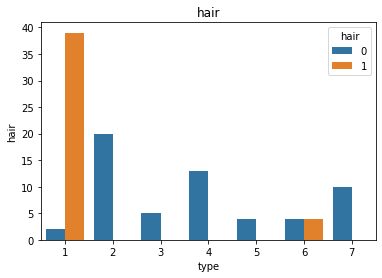

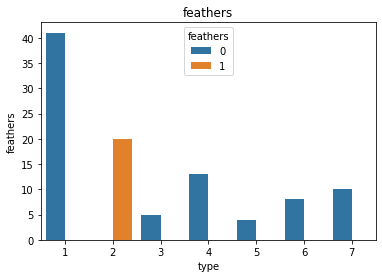

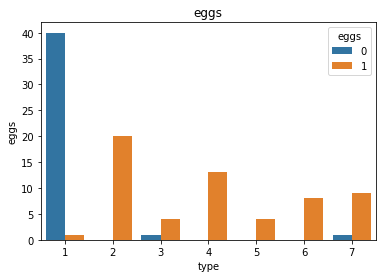

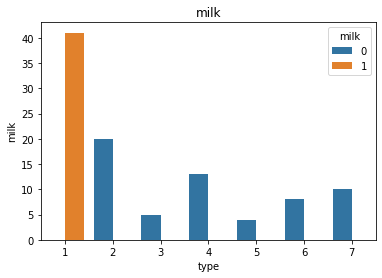

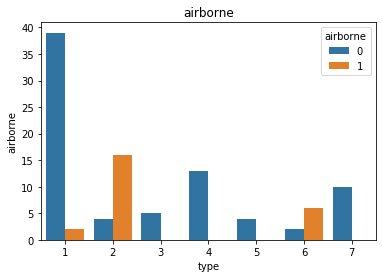

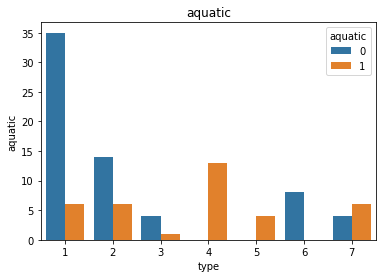

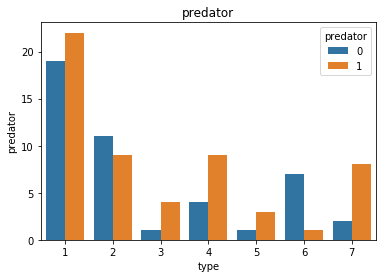

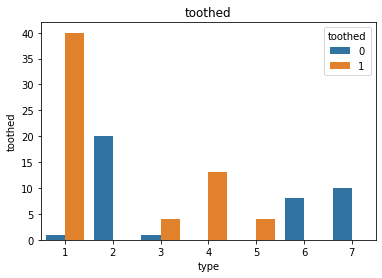

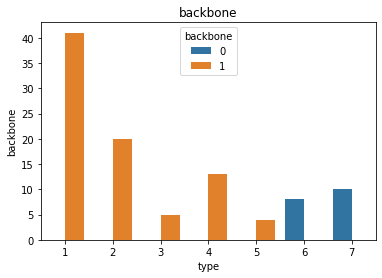

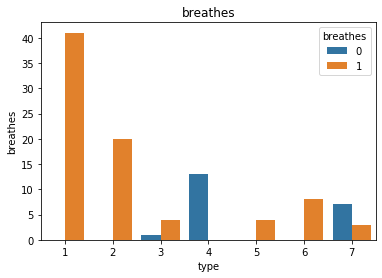

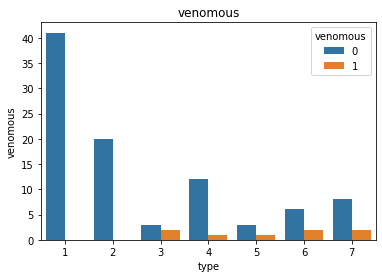

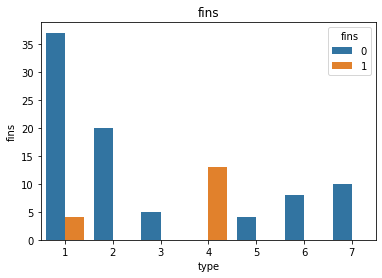

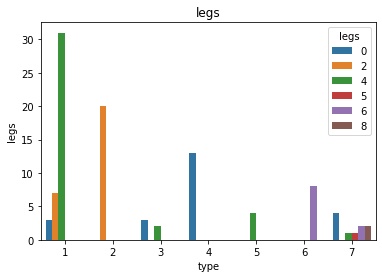

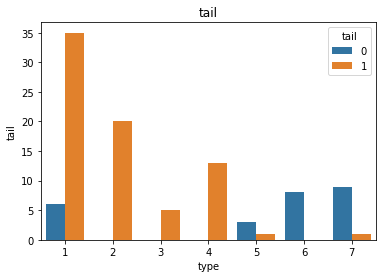

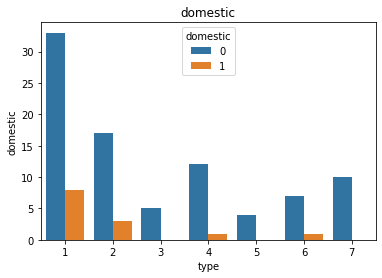

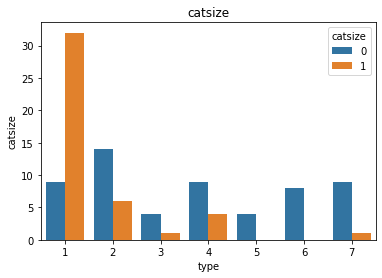

In [11]:
for i in zoo.columns:
    if i != 'animal name' and i != 'type':
        sbn.countplot(x='type',hue=i,data=zoo)
        plt.xlabel('type')
        plt.ylabel(i)
        plt.title(i)
        plt.show()



In [12]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [37]:

zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [38]:
X=zoo.iloc[:,:-1]
y=zoo['type']

In [40]:
y.shape


(101,)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
error=[]
for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error')

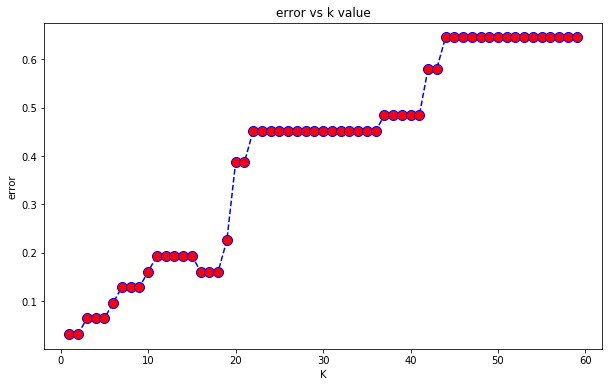

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error,color='blue',marker='o',markersize=10,linestyle='dashed',markerfacecolor='red')
plt.title('error vs k value')
plt.xlabel('K')
plt.ylabel('error')

In [48]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9354838709677419

In [54]:
cm=confusion_matrix(y_test,y_pred)

In [53]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        11\n           2       1.00      1.00      1.00         6\n           3       0.00      0.00      0.00         2\n           4       0.78      1.00      0.88         7\n           5       1.00      1.00      1.00         1\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         2\n\n    accuracy                           0.94        31\n   macro avg       0.83      0.86      0.84        31\nweighted avg       0.89      0.94      0.91        31\n'

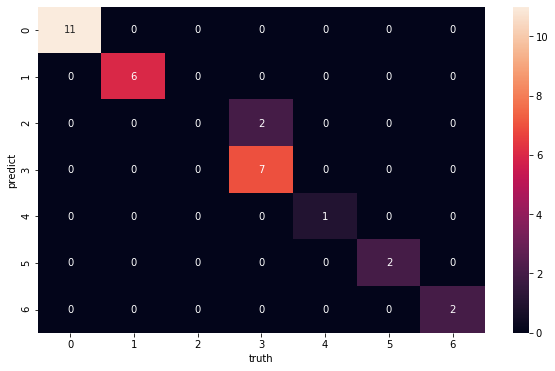

In [55]:
plt.figure(figsize=(10,6))
sbn.heatmap(cm,annot=True)
plt.xlabel('truth')
plt.ylabel('predict')
plt.show()